In [250]:
# importing libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import dash
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
import functions
# stops python from showing scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# importing cleaned and filtered dataframes

c_df = pd.read_csv('/Users/stephen/Flatiron/Phase2/Project2/Data/my_dataframe', index_col=0)
f_df = pd.read_csv('/Users/stephen/Flatiron/Phase2/Project2/Data/my_filtered_dataframe', index_col=0)
c_df.describe()
#print('clean_df = ', clean_df.describe())
#print('\n')
#print('filtered_df = ', filtered_df.describe())

price  yr_renovated  yr_built  condition    grade  zipcode  \
count   21597.00        744.00  21597.00   21597.00 21597.00 21597.00   
mean   540296.57       1995.93   1971.00       3.41     4.66 98077.95   
std    367368.14         15.60     29.38       0.65     1.17    53.51   
min     78000.00       1934.00   1900.00       1.00     0.00 98001.00   
25%    322000.00       1987.00   1951.00       3.00     4.00 98033.00   
50%    450000.00       2000.00   1975.00       3.00     4.00 98065.00   
75%    645000.00       2007.25   1997.00       4.00     5.00 98118.00   
max   7700000.00       2015.00   2015.00       5.00    10.00 98199.00   

           lat     long  cat_zipcode  
count 21597.00 21597.00     21597.00  
mean     47.56  -122.21     98077.95  
std       0.14     0.14        53.51  
min      47.16  -122.52     98001.00  
25%      47.47  -122.33     98033.00  
50%      47.57  -122.23     98065.00  
75%      47.68  -122.12     98118.00  
max      47.78  -121.31     98199.00

Take a look at out target varriable "Price"


In [251]:
#f_df = f_df[f_df['price'] > f_df['price'].quantile(.10)]
#f_df = f_df[f_df['condition'] > f_df['condition'].quantile(.05)]
f_df.describe()

clone = f_df.copy()

In [252]:
c_df.head()

price        date  yr_renovated  yr_built  condition  grade  view  \
0 221900.00  10/13/2014           nan      1955          3      4  NONE   
1 538000.00   12/9/2014       1991.00      1951          3      4  NONE   
2 180000.00   2/25/2015           nan      1933          3      3  NONE   
3 604000.00   12/9/2014           nan      1965          5      4  NONE   
4 510000.00   2/18/2015           nan      1987          3      5  NONE   

  waterfront  zipcode   lat    long cat_waterfront cat_view cat_condition  \
0        NaN    98178 47.51 -122.26            NaN     NONE       Average   
1         NO    98125 47.72 -122.32             NO     NONE       Average   
2         NO    98028 47.74 -122.23             NO     NONE       Average   
3         NO    98136 47.52 -122.39             NO     NONE     Very Good   
4         NO    98074 47.62 -122.05             NO     NONE       Average   

       cat_grade  cat_zipcode  
0      7 Average        98178  
1      7 Average        98125  
2  6 Low Average        98028  
3      7 Average        98136  
4         8 Good        98074

In [253]:
c_df = c_df[c_df['price'] < c_df['price'].quantile(.97)]

c_matrix = c_df.corr()
c_matrix['price']


price           1.00
yr_renovated    0.20
yr_built        0.06
condition       0.04
grade           0.66
zipcode        -0.02
lat             0.40
long            0.06
cat_zipcode    -0.02
Name: price, dtype: float64

In [254]:
c_df['price'].describe()

count     20934.00
mean     494837.35
std      236338.99
min       78000.00
25%      319000.00
50%      443000.00
75%      620000.00
max     1380000.00
Name: price, dtype: float64

In [284]:
f_matrix = f_df.corr()
f_matrix['price']

price          1.00
yr_renovated   0.10
yr_built       0.06
condition      0.02
grade          0.50
zipcode        0.02
lat            0.48
long           0.07
cat_zipcode    0.02
Name: price, dtype: float64

In [256]:
f_df.describe()

price  yr_renovated  yr_built  condition    grade  zipcode      lat  \
count  17277.00        431.00  17277.00   17277.00 17277.00 17277.00 17277.00   
mean  409236.47       1992.98   1970.37       3.40     4.32 98079.46    47.55   
std   139962.27         17.27     28.48       0.64     0.87    53.82     0.15   
min    78000.00       1934.00   1900.00       1.00     0.00 98001.00    47.16   
25%   298900.00       1983.00   1952.00       3.00     4.00 98033.00    47.44   
50%   399895.00       1996.00   1972.00       3.00     4.00 98065.00    47.55   
75%   519000.00       2007.00   1994.00       4.00     5.00 98118.00    47.68   
max   700180.00       2015.00   2015.00       5.00     8.00 98199.00    47.78   

          long  cat_zipcode  
count 17277.00     17277.00  
mean   -122.22     98079.46  
std       0.14        53.82  
min    -122.52     98001.00  
25%    -122.33     98033.00  
50%    -122.25     98065.00  
75%    -122.13     98118.00  
max    -121.31     98199.00

In [283]:

#Zipcode

#Train/Test Split
X = c_df.drop(columns=['price', 'yr_built', 'yr_renovated', 'lat', 'long', 'condition'])
y = c_df['price']

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

model = sm.OLS(y_train, sm.add_constant(X_train['grade'])).fit()
model.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [258]:

# For comparing the models, let's also use our evaluate() function to get R2, RMSE, MAE
train_preds = model.predict(sm.add_constant(X_train['grade']))
test_preds = model.predict(sm.add_constant(X_test['grade']))
functions.evaluate(y_train, train_preds, y_test, test_preds)

Train R2: 0.4286
Test R2: 0.4370
****
Train RMSE: $180,481.05
Test RMSE: $173,544.44
****
Train MAE: $138,751.58
Test MAE: $134,421.72


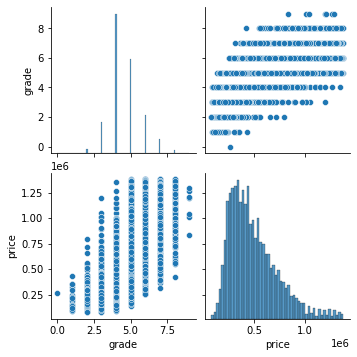

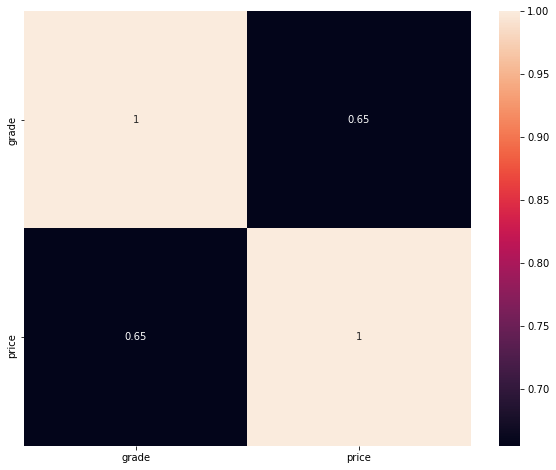

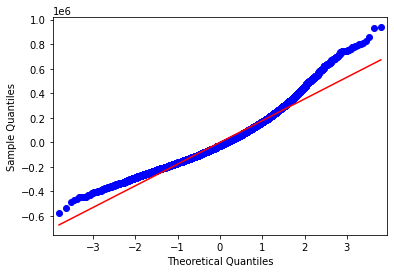

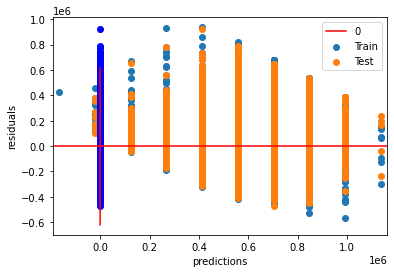

In [259]:

# Let's also check the assumptions of linearity.
functions.check_assumptions(X_train['grade'], y_train, train_preds, test_preds, y_test)

In [260]:
c_df['view'].value_counts(dropna=False)

NONE    19164
3.0       874
4.0       408
2.0       295
5.0       193
Name: view, dtype: int64

In [261]:
c_df['view'].unique()

array(['NONE', '4.0', '3.0', '5.0', '2.0'], dtype=object)

In [262]:
# check for view 
c_df['cat_view'].unique()

array(['NONE', nan, 'GOOD', 'AVERAGE', 'EXCELLENT', 'FAIR'], dtype=object)

In [263]:
#view_df = c_df.drop(c_df[c_df['cat_view'] == "NONE"])

In [264]:
view_df = c_df[c_df.view != "NONE"]
#view_df = c_df[c_df.cat_view.notnull()]

In [265]:
view_df.dropna(subset=['view'], inplace=True)

<ipython-input-265-ff791ed5d5a1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [266]:
view_df['view'].value_counts(dropna=False)

3.0    874
4.0    408
2.0    295
5.0    193
Name: view, dtype: int64

In [267]:
view_df['view']

15       4.0
49       3.0
58       5.0
60       4.0
99       3.0
        ... 
21523    4.0
21538    3.0
21563    3.0
21577    3.0
21582    3.0
Name: view, Length: 1770, dtype: object

In [268]:
view_df['view'].astype(str).astype(float)

15      4.00
49      3.00
58      5.00
60      4.00
99      3.00
        ... 
21523   4.00
21538   3.00
21563   3.00
21577   3.00
21582   3.00
Name: view, Length: 1770, dtype: float64

In [269]:
view_df['view'] = pd.to_numeric(view_df['view'])

<ipython-input-269-0c3e739d3aef>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [270]:
view_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1770 entries, 15 to 21582
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           1770 non-null   float64
 1   date            1770 non-null   object 
 2   yr_renovated    119 non-null    float64
 3   yr_built        1770 non-null   int64  
 4   condition       1770 non-null   int64  
 5   grade           1770 non-null   int64  
 6   view            1770 non-null   float64
 7   waterfront      1549 non-null   object 
 8   zipcode         1770 non-null   int64  
 9   lat             1770 non-null   float64
 10  long            1770 non-null   float64
 11  cat_waterfront  1549 non-null   object 
 12  cat_view        1770 non-null   object 
 13  cat_condition   1770 non-null   object 
 14  cat_grade       1770 non-null   object 
 15  cat_zipcode     1770 non-null   int64  
dtypes: float64(5), int64(5), object(6)
memory usage: 235.1+ KB


In [271]:
view_df.columns

Index(['price', 'date', 'yr_renovated', 'yr_built', 'condition', 'grade',
       'view', 'waterfront', 'zipcode', 'lat', 'long', 'cat_waterfront',
       'cat_view', 'cat_condition', 'cat_grade', 'cat_zipcode'],
      dtype='object')

In [272]:
view_df.dtypes

price             float64
date               object
yr_renovated      float64
yr_built            int64
condition           int64
grade               int64
view              float64
waterfront         object
zipcode             int64
lat               float64
long              float64
cat_waterfront     object
cat_view           object
cat_condition      object
cat_grade          object
cat_zipcode         int64
dtype: object

In [273]:
v_matrix = view_df.corr()
v_matrix['price']

price           1.00
yr_renovated    0.22
yr_built        0.11
condition       0.02
grade           0.61
view            0.21
zipcode        -0.08
lat             0.39
long           -0.01
cat_zipcode    -0.08
Name: price, dtype: float64

In [274]:
clone.describe()

price  yr_renovated  yr_built  condition    grade  zipcode      lat  \
count  17277.00        431.00  17277.00   17277.00 17277.00 17277.00 17277.00   
mean  409236.47       1992.98   1970.37       3.40     4.32 98079.46    47.55   
std   139962.27         17.27     28.48       0.64     0.87    53.82     0.15   
min    78000.00       1934.00   1900.00       1.00     0.00 98001.00    47.16   
25%   298900.00       1983.00   1952.00       3.00     4.00 98033.00    47.44   
50%   399895.00       1996.00   1972.00       3.00     4.00 98065.00    47.55   
75%   519000.00       2007.00   1994.00       4.00     5.00 98118.00    47.68   
max   700180.00       2015.00   2015.00       5.00     8.00 98199.00    47.78   

          long  cat_zipcode  
count 17277.00     17277.00  
mean   -122.22     98079.46  
std       0.14        53.82  
min    -122.52     98001.00  
25%    -122.33     98033.00  
50%    -122.25     98065.00  
75%    -122.13     98118.00  
max    -121.31     98199.00

In [282]:
# showing different view 

fig = px.scatter_mapbox(f_df, hover_name="zipcode", hover_data=["price"],
                        lat='lat',
                        lon='long',
                        color='price',
                         
                        size = 'zipcode',
                        color_continuous_scale=px.colors.sequential.matter, size_max=15,
                        zoom=5)
fig.update_layout(mapbox_style='open-street-map')

fig.show()




                                                    
                                                    


Map showing view

In [276]:



fig = px.scatter_mapbox(c_df, hover_name="view", hover_data=["view", "zipcode"],
                        lat='lat',
                        lon='long',
                        color='view', 
                        size = 'zipcode',
                        color_continuous_scale=px.colors.sequential.matter, size_max=15,
                        zoom=8)
fig.update_layout(mapbox_style='open-street-map')

fig.show()


In [277]:
# View 

#Train/Test Split
X = view_df.drop(columns=['price', 'date', 'yr_renovated', 'yr_built', 'condition', 'grade', 'waterfront', 'zipcode', 'lat', 'long', 'cat_waterfront', 'cat_view', 'cat_condition', 'cat_grade', 'cat_zipcode'])
y= view_df['price']

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

model = sm.OLS(y_train, sm.add_constant(X_train['view'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     52.66
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           7.14e-13
Time:                        09:21:35   Log-Likelihood:                -16549.
No. Observations:                1185   AIC:                         3.310e+04
Df Residuals:                    1183   BIC:                         3.311e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.905e+05   3.18e+04     15.404      0.000    4.28e+05    5.53e+05
view         6.83e+04   9411.713      7.257      0.000    4.98e+04    8.68e+04
==============================================================================
Omnibus:                       55.327   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.821
Skew:                           0.476   Prob(JB):                     2.06e-12
Kurtosis:                       2.571   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [278]:

# For comparing the models, let's also use our evaluate() function to get R2, RMSE, MAE
train_preds = model.predict(sm.add_constant(X_train['view']))
test_preds = model.predict(sm.add_constant(X_test['view']))
functions.evaluate(y_train, train_preds, y_test, test_preds)

Train R2: 0.0426
Test R2: 0.0472
****
Train RMSE: $281,106.03
Test RMSE: $273,851.71
****
Train MAE: $228,275.49
Test MAE: $226,875.62


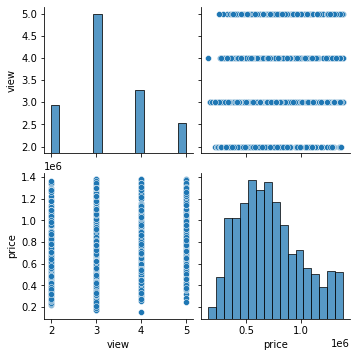

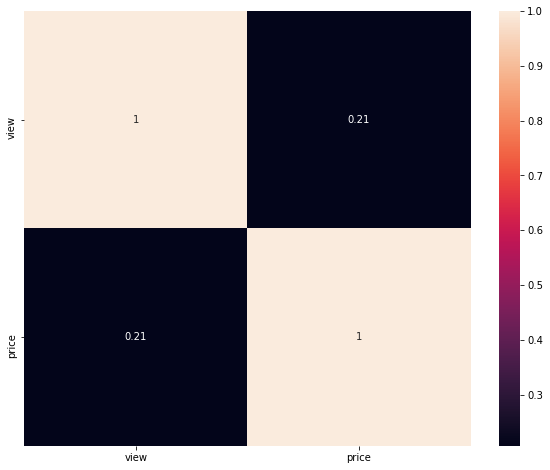

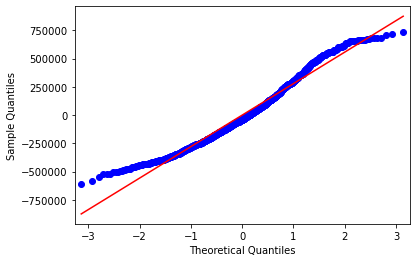

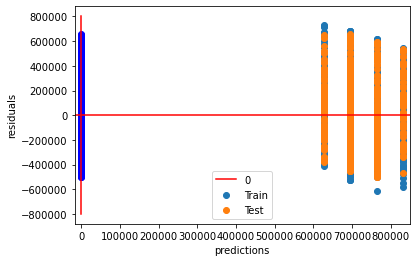

In [279]:
functions.check_assumptions(X_train['view'], y_train, train_preds, test_preds, y_test)

In [280]:

# Let's also check the assumptions of linearity.y_train, train_preds, test_preds, y_test)

In [281]:
X_train

view
12299  4.00
8337   3.00
14138  3.00
12187  3.00
4609   3.00
...     ...
12741  4.00
7816   2.00
1660   5.00
3068   2.00
17643  5.00

[1185 rows x 1 columns]